# Titanic - Machine learning

In [679]:
import pandas as pd
import matplotlib as plt
import sklearn as sk
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [680]:
df = pd.read_csv('train.csv')

## Data Cleaning

In [681]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [682]:
df=df.drop(["Name","Ticket","Cabin","Embarked", "Fare","PassengerId"], axis=1)

In [683]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [684]:
from sklearn.preprocessing import LabelBinarizer

# create an instance of LabelBinarizer
encoder = LabelBinarizer()

# fit the encoder on the categorical data
df['Sex'] = encoder.fit_transform(df['Sex'])

df


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0
...,...,...,...,...,...,...
886,0,2,1,27.0,0,0
887,1,1,0,19.0,0,0
888,0,3,0,NaN,1,2
889,1,1,1,26.0,0,0


In [685]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Pclass'].fillna(df['Pclass'].mean(), inplace=True)
df['SibSp'].fillna(df['SibSp'].mean(), inplace=True)
df['Parch'].fillna(df['Parch'].mean(), inplace=True)

### Understanding the data

In [686]:
sns.set_theme(style="white")
correlation = df.corr()

<AxesSubplot: >

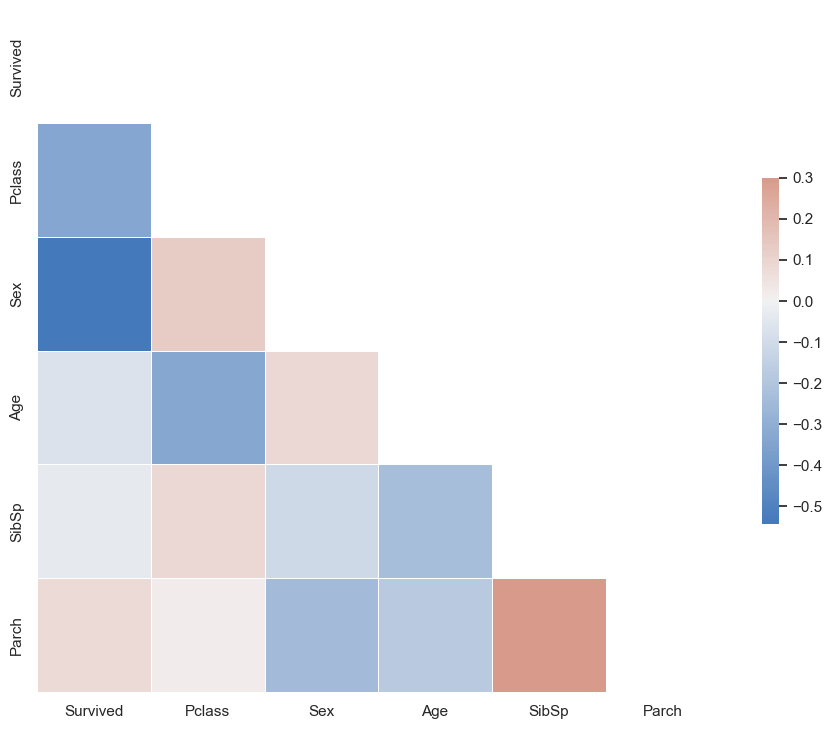

In [687]:
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Looks like Sex and Pclass are the biggest denominators followed a little by age
Age also has a big correlation with Pclass, who's used to determinate survival.
Let's see if SipSp and Parch relation is truly linear !

#### Changing the data

In [688]:
def change_age(age):
    if(age<=10):
        return 'Child'
    elif(10<age<=20):
       return 'teenager'
    elif(20<age<=60):
       return 'Adult'
    elif(age>60):
        return 'Ederly'

In [689]:
df['Age']=df['Age'].apply(change_age)

In [690]:
df['Family_Size']=df['SibSp']+df['Parch']

In [691]:
df=df.drop(['SibSp','Parch'],axis=1)

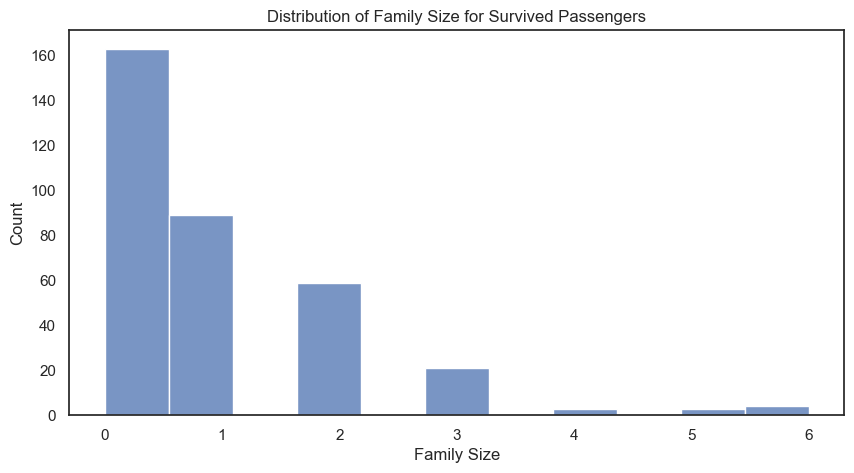

In [692]:
# Create a subset of the dataset with only the rows where Survived = 1
survived = df[df['Survived'] == 1]['Family_Size']

# Plot a histogram of the Family_size values in the Survived = 1 subset
plt.figure(figsize=(10, 5))
sns.histplot(survived, kde=False)
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Distribution of Family Size for Survived Passengers')
plt.show()

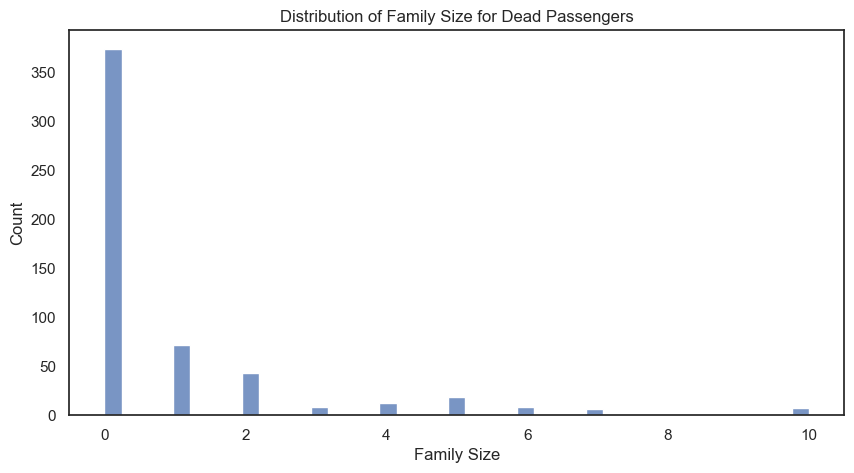

In [693]:
# Create a subset of the dataset with only the rows where Survived = 1
survived = df[df['Survived'] == 0]['Family_Size']

# Plot a histogram of the Family_size values in the Survived = 1 subset
plt.figure(figsize=(10, 5))
sns.histplot(survived, kde=False)
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Distribution of Family Size for Dead Passengers')
plt.show()

## Pre-Processing The Data

Let's take a look at df !

In [694]:
df

,Survived,Pclass,Sex,Age,Family_Size
0,0,3,1,Adult,1
1,1,1,0,Adult,1
2,1,3,0,Adult,0
3,1,1,0,Adult,1
4,0,3,1,Adult,0
...,...,...,...,...,...
886,0,2,1,Adult,0
887,1,1,0,teenager,0
888,0,3,0,Adult,3
889,1,1,1,Adult,0


### Encoding the data

In [695]:
from sklearn.preprocessing import OneHotEncoder

In [696]:
encoder = OneHotEncoder()
encoded_age=encoder.fit_transform(df[['Age']])
encoded_age = pd.DataFrame(encoded_age.toarray(), columns=encoder.get_feature_names_out(['Age']))
df = pd.concat([df, encoded_age], axis=1)
df = df.drop('Age', axis=1)

In [697]:
encoder_2= OneHotEncoder()
encoded_class=encoder_2.fit_transform(df[['Pclass']])
encoded_class = pd.DataFrame(encoded_class.toarray(), columns=encoder_2.get_feature_names_out(['Pclass']))
df = pd.concat([df, encoded_class], axis=1)
df = df.drop('Pclass', axis=1)

In [698]:
df

,Survived,Sex,Family_Size,Age_Adult,Age_Child,Age_Ederly,Age_teenager,Pclass_1,Pclass_2,Pclass_3
0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
887,1,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
888,0,0,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Looks like it's ready !

## testing the model

For this part, I choose the LogisticRegression model because the outcome is either 1 or 0.

#### Encoding the test data

In [699]:
test=pd.read_csv('test.csv')

In [700]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [701]:
test=test.drop(["Name","Ticket","Cabin","Embarked", "Fare","PassengerId"], axis=1)

In [702]:
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Pclass'].fillna(test['Pclass'].mean(), inplace=True)
test['SibSp'].fillna(test['SibSp'].mean(), inplace=True)
test['Parch'].fillna(test['Parch'].mean(), inplace=True)

In [703]:
test['Age']=test['Age'].apply(change_age)

In [704]:
test['Family_Size']=test['SibSp']+test['Parch']

In [705]:
test=test.drop(['SibSp','Parch'],axis=1)

In [706]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()

In [707]:
encoder1 = OneHotEncoder()
encoded_age1=encoder1.fit_transform(test[['Age']])
encoded_age1 = pd.DataFrame(encoded_age1.toarray(), columns=encoder1.get_feature_names_out(['Age']))
test = pd.concat([test, encoded_age1], axis=1)
test = test.drop('Age', axis=1)


In [708]:
encoder2= OneHotEncoder()
encoded_class2=encoder2.fit_transform(test[['Pclass']])
encoded_class2 = pd.DataFrame(encoded_class2.toarray(), columns=encoder2.get_feature_names_out(['Pclass']))
test = pd.concat([test, encoded_class2], axis=1)
test = test.drop('Pclass', axis=1)

In [709]:
encoder3 = LabelBinarizer()

# fit the encoder on the categorical data
test['Sex'] = encoder3.fit_transform(test['Sex'])
test

,Sex,Family_Size,Age_Adult,Age_Child,Age_Ederly,Age_teenager,Pclass_1,Pclass_2,Pclass_3
0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
414,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
415,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
416,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Testing the model

In [710]:
from sklearn.model_selection import GridSearchCV

In [711]:
X = df.drop(["Survived"], axis=1).values
y = df["Survived"].values

In [712]:
model = LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [720]:
param_grid = {
    'C': [0.1, 1, 10, 50, 100, 1000],
    'penalty': ['l2']
}
for i in range (2,26):
    grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy',cv=i, n_jobs=-1,error_score='raise')
    grid.fit(X, y)

    # print the best parameters and accuracy score
    print(i , "Best parameters:", grid.best_params_)
    print("Accuracy:", grid.best_score_)

2 Best parameters: {'C': 1, 'penalty': 'l2'}
Accuracy: 0.7912480475638635
3 Best parameters: {'C': 1, 'penalty': 'l2'}
Accuracy: 0.8035914702581369
4 Best parameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.8080889185149275
5 Best parameters: {'C': 1, 'penalty': 'l2'}
Accuracy: 0.8047140794677045
6 Best parameters: {'C': 50, 'penalty': 'l2'}
Accuracy: 0.808067295483403
7 Best parameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.8080972300337458
8 Best parameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.8103281853281854
9 Best parameters: {'C': 50, 'penalty': 'l2'}
Accuracy: 0.8080808080808081
10 Best parameters: {'C': 1, 'penalty': 'l2'}
Accuracy: 0.8080898876404493
11 Best parameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.8080808080808081
12 Best parameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.8092342342342341
13 Best parameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.8080529870811202
14 Best parameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.808106575963719
15 Best parameters: {'C': 

In [714]:
model_final = model = LogisticRegression()

In [715]:
kf = KFold(n_splits=17)
for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model_final = LogisticRegression(C=10, penalty='l2')
        model_final.fit(X_train,y_train)

In [716]:
predictions = model_final.predict(test.values)

In [717]:
test_data=pd.read_csv('test.csv')

In [718]:
final = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

In [719]:
final.to_csv('submission2.csv', index=False)